In [1]:
import re
import os
import nltk
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import reuters
import collections
from transformers import pipeline

%load_ext nb_black

<IPython.core.display.Javascript object>

In [33]:
news_df = pd.read_pickle("C:/Users/rparg/Documents/Data/Reuters/news_df.pkl")
sc_sample_df = pd.read_pickle("C:/Users/rparg/Documents/Data/Reuters/sc_sample.pkl")
sc_class_df = pd.read_pickle("C:/Users/rparg/Documents/Data/Reuters/sc_cat.pkl")

<IPython.core.display.Javascript object>

In [34]:
sc_df = sc_sample_df.join(sc_class_df, how="inner")
sc_df = sc_df.drop(columns=["title_length", "con_length"]).rename(
    {"top_label": "actual", "labels": "predicted"}, axis=1
)
sc_df["predicted"] = sc_df["predicted"].apply(lambda x: x[0])

<IPython.core.display.Javascript object>

In [39]:
target_cat = [
    "aluminum",
    "barley",
    "cocoa",
    "coffee",
    "copper",
    "corn",
    "cotton",
    "crude",
    "gold",
    "grain",
    "iron steel",
    "livestock",
    "natural gas",
    "rubber",
    "sugar",
]

<IPython.core.display.Javascript object>

In [36]:
print(
    sklearn.metrics.classification_report(
        y_true=sc_df["actual"], y_pred=sc_df["predicted"], zero_division=1
    )
)

              precision    recall  f1-score   support

    aluminum       0.89      0.62      0.73        13
      barley       0.29      0.14      0.19        14
       cocoa       0.00      0.00      0.00        13
      coffee       0.00      0.00      0.00        18
      copper       0.09      0.08      0.08        13
        corn       0.00      0.00      0.00        20
      cotton       0.00      0.00      0.00        16
       crude       0.08      0.11      0.09        19
        gold       0.06      0.05      0.06        19
       grain       0.00      0.00      0.00        19
  iron steel       0.00      0.00      0.00        14
   livestock       0.06      0.07      0.06        15
 natural gas       0.00      1.00      0.00         0
      rubber       0.00      1.00      0.00         0
       sugar       0.00      1.00      0.00         0

    accuracy                           0.08       193
   macro avg       0.10      0.27      0.08       193
weighted avg       0.11   

<IPython.core.display.Javascript object>

In [40]:
cf_matrix = sklearn.metrics.confusion_matrix(
    y_true=sc_df["actual"], y_pred=sc_df["predicted"]
)
ncf_matrix = cf_matrix.astype("float") / cf_matrix.sum(axis=1)[:, np.newaxis]

C:\Users\rparg\AppData\Local\Temp\ipykernel_9820\4035932529.py:4: RuntimeWarning: invalid value encountered in true_divide
  ncf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]


<IPython.core.display.Javascript object>

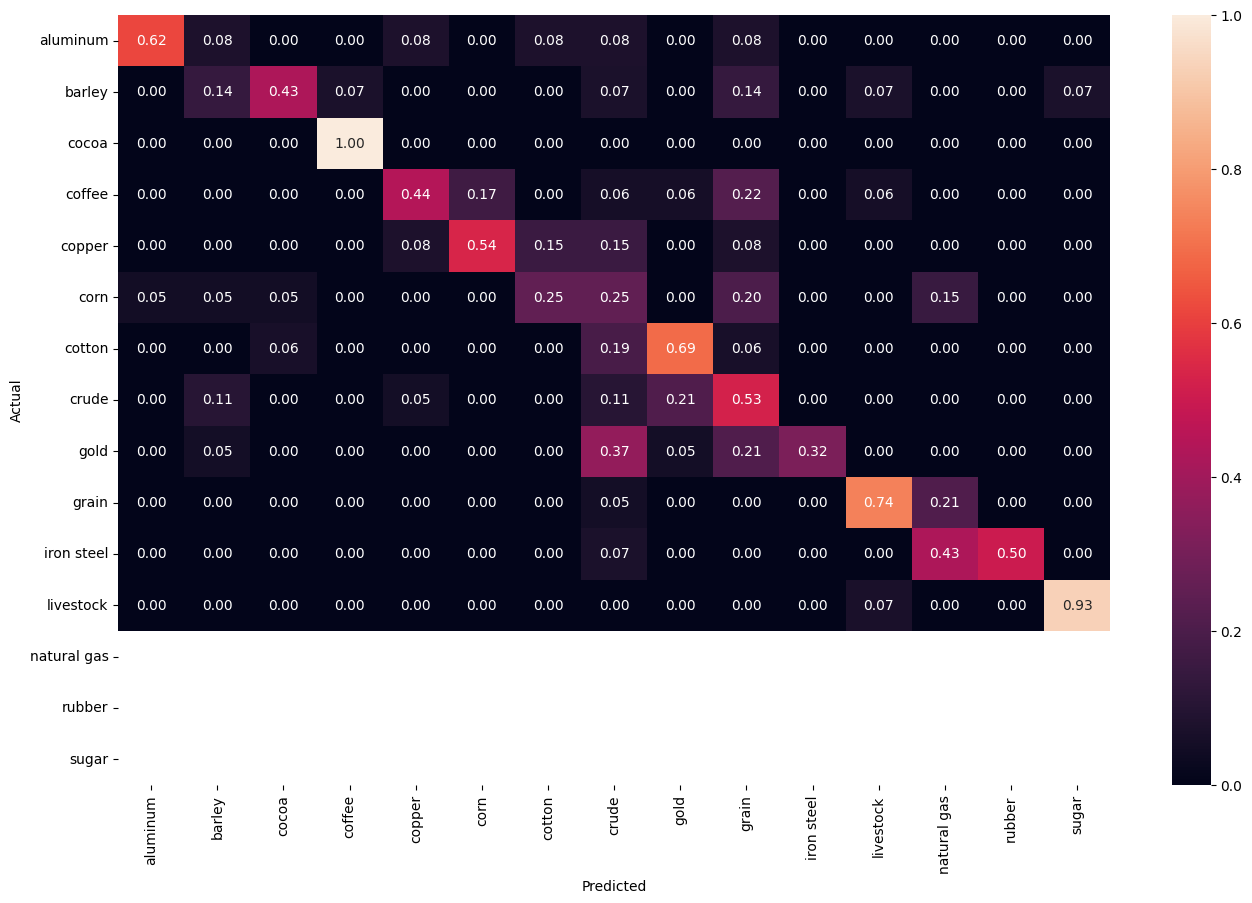

<IPython.core.display.Javascript object>

In [42]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(
    ncf_matrix,
    ax=ax,
    annot=True,
    fmt=".2f",
    xticklabels=target_cat,
    yticklabels=target_cat,
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show(block=False)
plt.show()